# Contents
Set Up

Day of Week Bar Chart: .plot.bar(), figure export as png

Price Plots: .plot.hist(), .scatterplot

Subsetting Data: randomization

Line Chart: sns.lineplot

Questions

# Set Up

In [1]:
#setup
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
path = r"C:\Users\irkat\OneDrive - University of North Carolina at Charlotte\Desktop\Data Cert\A4"

In [2]:
#import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared', 'data.pkl'))

In [3]:
df.shape

(32404859, 28)

In [4]:
df.head()

,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,reordered,product_name,aisle_id,department_id,prices,...,spending_flag,days_median,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,1,1,2,8,11.0,0,Soda,77,7,9.0,...,Low spender,20.0,Fequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2,3,7,15.0,1,Soda,77,7,9.0,...,Low spender,20.0,Fequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
2,1,3,3,12,21.0,1,Soda,77,7,9.0,...,Low spender,20.0,Fequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
3,1,4,4,7,29.0,1,Soda,77,7,9.0,...,Low spender,20.0,Fequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
4,1,5,4,15,28.0,1,Soda,77,7,9.0,...,Low spender,20.0,Fequent Customer,Female,Alabama,31,2/17/2019,3,married,40423


## Day of Week Bar Chart

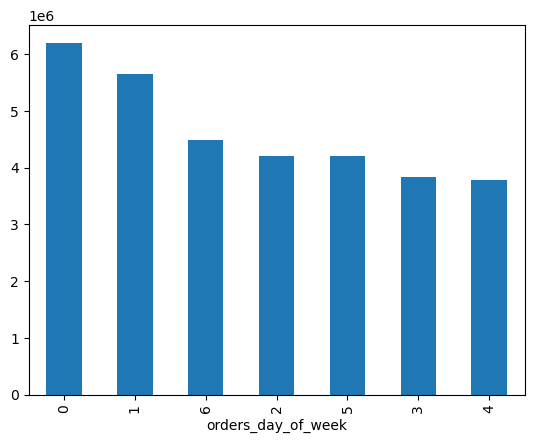

In [5]:
bar = df['orders_day_of_week'].value_counts().plot.bar()

In [6]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'bar_orders_dow.png'))

## Prices plots

<Axes: ylabel='Frequency'>

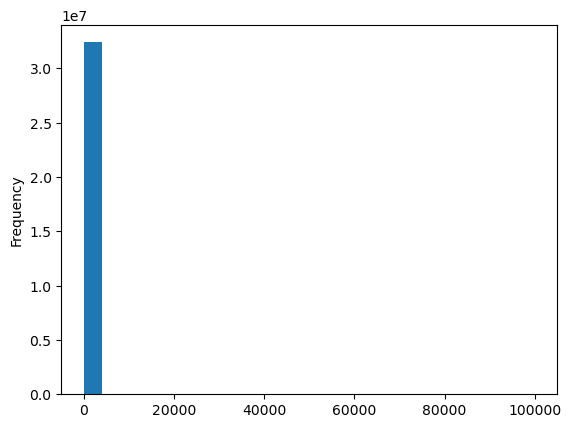

In [7]:
#histogram
df['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

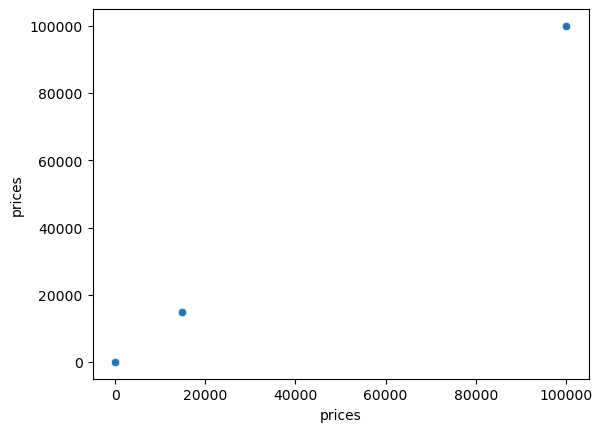

In [8]:
#scatterplot - skewed by outliers
sns.scatterplot(x = 'prices', y = 'prices',data = df)

### Extra Cleaning

In [9]:
#check for high prices, identify outliers skewing charts
df.loc[df['prices'] > 100]

,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,reordered,product_name,aisle_id,department_id,prices,...,spending_flag,days_median,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
7805,1519,26,2,11,6.0,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,...,High spender,6.0,Fequent Customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1519,32,3,10,5.0,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,...,High spender,6.0,Fequent Customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,2409,33,1,19,5.0,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,...,High spender,5.0,Fequent Customer,Female,Hawaii,55,11/11/2018,2,married,230074
20264,3531,27,2,19,8.0,0,2 % Reduced Fat Milk,84,16,99999.0,...,High spender,10.0,Fequent Customer,Female,Hawaii,80,10/6/2019,2,married,233776
20497,3793,1,2,9,11.0,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,...,High spender,11.0,Fequent Customer,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,51346,4,1,17,13.0,1,2 % Reduced Fat Milk,84,16,99999.0,...,High spender,11.0,Fequent Customer,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,131671,12,4,9,15.0,0,2 % Reduced Fat Milk,84,16,99999.0,...,High spender,13.0,Fequent Customer,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,39667,7,2,15,20.0,0,2 % Reduced Fat Milk,84,16,99999.0,...,High spender,23.0,Non-frequent Customer,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,95105,2,4,19,22.0,0,2 % Reduced Fat Milk,84,16,99999.0,...,High spender,6.0,Fequent Customer,Female,South Carolina,48,1/18/2017,2,married,398880


In [10]:
#change outliers to missing
df.loc[df['prices'] >100, 'prices'] = np.nan

In [11]:
#25$ reasonable price max
df['prices'].max()

25.0

### End Extra Cleaning

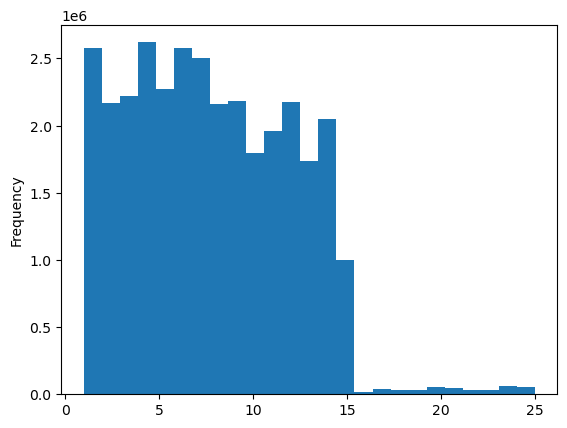

In [12]:
#histogram - low priced items are purchased with more frequency
hist = df['prices'].plot.hist(bins = 25)

In [13]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'hist_price.png'))

## Subset Data

In [14]:
#assigning random values 70 and 30
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [15]:
#creating subset data sets
big = df[dev]
small = df[~dev]

In [16]:
len(big) + len(small)

32404859

## Line Chart

In [17]:
#subset for line chart
df_2 = small[['orders_day_of_week','prices']]

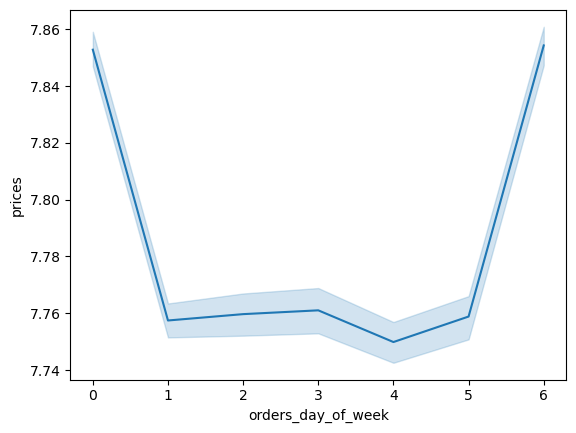

In [18]:
#orders placed on the weekend cost more
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [19]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'line_dow_prices.png'))

## Questions

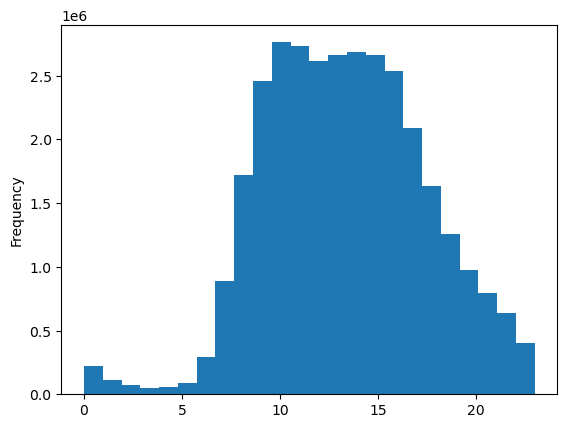

In [20]:
#Q3: this histogram shows that most purchases are made in the middle of the day, from 10 am to 4pm. there are very few orders placed at night
hist = df['order_time'].plot.hist(bins = 24)

In [21]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'hist_times.png'))

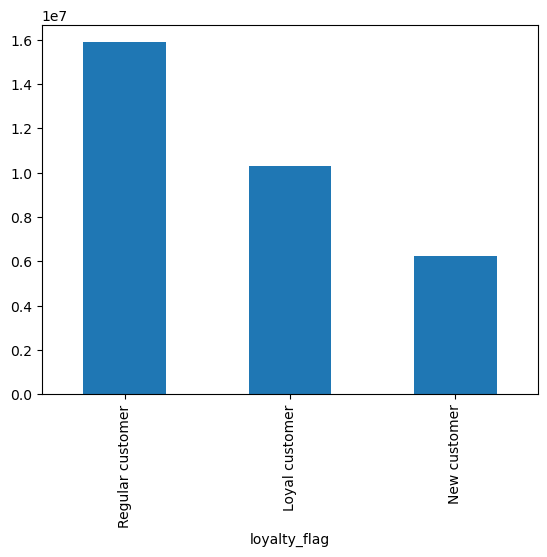

In [22]:
#Q4: barchart for loyalty
bar = df['loyalty_flag'].value_counts().plot.bar()

In [23]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'bar_loyalty.png'))

In [24]:
#subset for line
df_3 = small[['order_time', 'prices']]

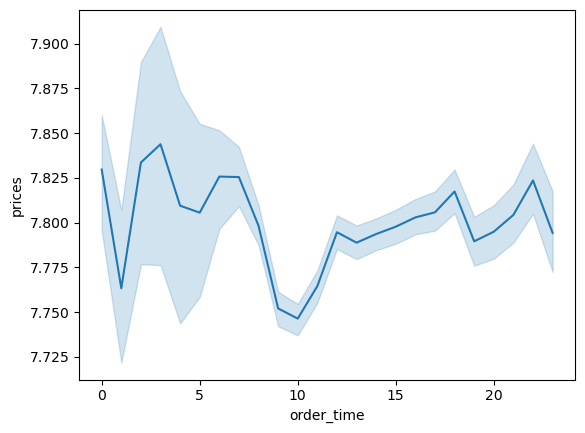

In [25]:
#Q5
line = sns.lineplot(data = df_3, x = 'order_time',y = 'prices')

In [26]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'line_time_price.png'))

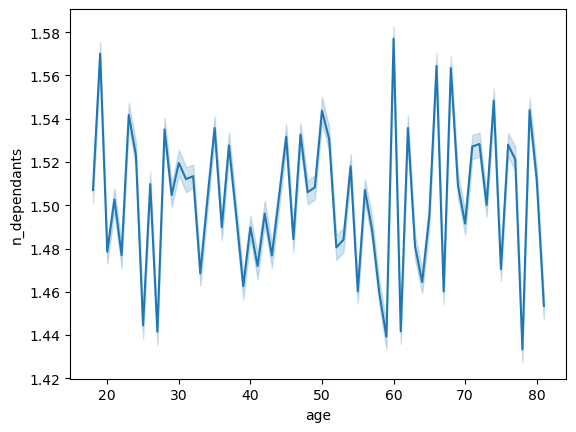

In [27]:
#Q6: there is no corelation age and number of dependants
line = sns.lineplot(data = small, x = 'age',y = 'n_dependants')

In [28]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'line_age_dependants.png'))

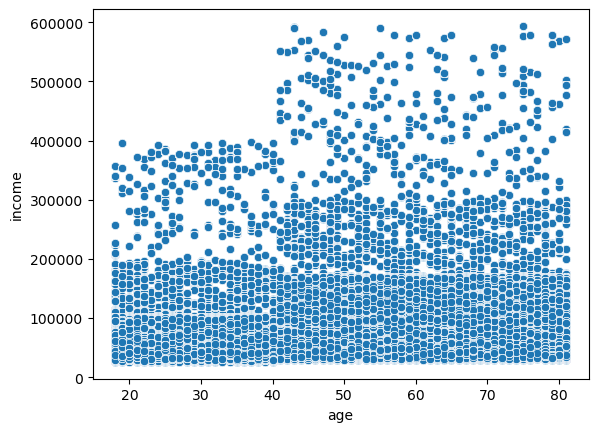

In [29]:
#Q7: this plot shows that income for most increases after age 40
scatter = sns.scatterplot(data = small, x = 'age',y = 'income')

In [30]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'bar_orders_dow.png'))

In [31]:
#export
df.to_pickle(os.path.join(path, '02 Data','Prepared', 'data.pkl'))

In [ ]:
#export
small.to_pickle(os.path.join(path, '02 Data','Prepared', 'small_subset.pkl'))

In [ ]:
#export
big.to_pickle(os.path.join(path, '02 Data','Prepared', 'large_subset.pkl'))